### Problem statement
Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads, which can be used by the company to target potential leads

### This data set contains the following features:
Prospect ID: A unique ID with which the customer is identified.

Lead Number: A lead number assigned to each lead procured.

Lead Origin: The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

Lead Source: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

Do Not Email: An indicator variable selected by the customer wherein they select whether or not they want to be emailed about the course or not.

Do Not Call: An indicator variable selected by the customer wherein they select whether or not they want to be called about the course or not.

Converted: The target variable. Indicates whether a lead has been successfully converted or not.

TotalVisits: The total number of visits made by the customer on the website.

Total Time Spent on Website: The total time spent by the customer on the website.

Page Views Per Visit: Average number of pages on the website viewed during the visits.

Last Activity: Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

Country: The country of the customer.

Specialization: The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form. 
How did you hear about X Education: The source from which the cu stomer heard about X Education. 

What is your current occupation: Indicates whether the customer is a student, unemployed, or employed.

What matters most to you in choosing this course: An option selected by the customer indicating their main motto behind doing this course.

Search: Indicating whether the customer had seen the ad in any of the listed items.

Magazine: Indicating whether the customer had seen the ad in any of the listed items.

Newspaper Article: Indicating whether the customer had seen the ad in any of the listed items.

X Education Forums: Indicating whether the customer had seen the ad in any of the listed items.

Newspaper: Indicating whether the customer had seen the ad in any of the listed items.

Digital Advertisement: Indicating whether the customer had seen the ad in any of the listed items

Through Recommendations: Indicates whether the customer came in through recommendations.

Receive More Updates About Our Courses: Indicates whether the customer chose to receive more updates about the courses.

Tags: Tags assigned to customers indicating the current status of the lead.

Lead Quality: Indicates the quality of lead based on the data and intuition of the employee who has been assigned to the lead.

Update me on Supply Chain Content: Indicates whether the customer wants updates on the Supply Chain Content.

Get updates on DM Content: Indicates whether the customer wants updates on the DM Content.

Lead Profile: A lead level assigned to each customer based on their profile.

City: The city of the customer.

Asymmetrique Activity Index: An index and score assigned to each customer based on their activity and their profile.

Asymmetrique Profile Index: An index and score assigned to each customer based on their activity and their profile.

Asymmetrique Activity Score: An index and score assigned to each customer based on their activity and their profile.

Asymmetrique Profile Score: An index and score assigned to each customer based on their activity and their profile.

I agree to pay the amount through cheque: Indicates whether the customer has agreed to pay the amount through cheque or not.

A free copy of Mastering The Interview: Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

Last Notable Activity: The last notable activity performed by the student.

In [6832]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [6833]:
data = pd.read_csv('/Users/mrbinit/Downloads/Leads.csv')

In [6834]:
data.shape

(9240, 37)

### Understanding missing value

In [6835]:
missing_value = data.isnull().sum()
print(missing_value)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Changing columns name


In [6836]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6837]:
# Dictionary to map old column names to new column names
column_mapping = {
    'Prospect ID': 'Prospect_ID',
    'Lead Number': 'Lead_Number',
    'Lead Origin': 'Lead_Origin',
    'Lead Source': 'Lead_Source',
    'Do Not Email': 'Do_Not_Email',
    'Do Not Call': 'Do_Not_Call',
    'Converted': 'Converted',
    'TotalVisits': 'Total_Visits',
    'Total Time Spent on Website': 'Total_Time_Spent_on_Website',
    'Page Views Per Visit': 'Page_Views_Per_Visit',
    'Last Activity': 'Last_Activity',
    'Country': 'Country',
    'Specialization': 'Specialization',
    'How did you hear about X Education': 'How_did_you_hear_about_X_Education',
    'What is your current occupation': 'Current_Occupation',
    'What matters most to you in choosing a course': 'Matters_Most_Choosing_Course',
    'Search': 'Search',
    'Magazine': 'Magazine',
    'Newspaper Article': 'Newspaper_Article',
    'X Education Forums': 'X_Education_Forums',
    'Newspaper': 'Newspaper',
    'Digital Advertisement': 'Digital_Advertisement',
    'Through Recommendations': 'Through_Recommendations',
    'Receive More Updates About Our Courses': 'Receive_More_Updates',
    'Tags': 'Tags',
    'Lead Quality': 'Lead_Quality',
    'Update me on Supply Chain Content': 'Update_on_Supply_Chain_Content',
    'Get updates on DM Content': 'Update_on_DM_Content',
    'Lead Profile': 'Lead_Profile',
    'City': 'City',
    'Asymmetrique Activity Index': 'Asymmetrique_Activity_Index',
    'Asymmetrique Profile Index': 'Asymmetrique_Profile_Index',
    'Asymmetrique Activity Score': 'Asymmetrique_Activity_Score',
    'Asymmetrique Profile Score': 'Asymmetrique_Profile_Score',
    'I agree to pay the amount through cheque': 'Agree_to_Pay_Cheque',
    'A free copy of Mastering The Interview': 'Free_Copy_Mastering_The_Interview',
    'Last Notable Activity': 'Last_Notable_Activity',
}

# Rename the columns using the mapping
data.rename(columns=column_mapping, inplace=True)

In [6838]:
data.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'Total_Visits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'Current_Occupation', 'Matters_Most_Choosing_Course', 'Search',
       'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates', 'Tags', 'Lead_Quality',
       'Update_on_Supply_Chain_Content', 'Update_on_DM_Content',
       'Lead_Profile', 'City', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score', 'Agree_to_Pay_Cheque',
       'Free_Copy_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

In [6839]:
data.shape

(9240, 37)

In [6840]:
data.head(10)

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Update_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Agree_to_Pay_Cheque,Free_Copy_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


### finding columns with select


In [6841]:
data.columns[data.isin(['Select']). any()]

Index(['Specialization', 'How_did_you_hear_about_X_Education', 'Lead_Profile',
       'City'],
      dtype='object')

### Replacing select with nan

In [6842]:
# Replace selected values with null values
data = data.replace("Select", np.nan)


In [6843]:
data.columns[data.isin(['Select']). any()]

Index([], dtype='object')

In [6844]:
data.head(10)

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Update_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Agree_to_Pay_Cheque,Free_Copy_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [6845]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Prospect_ID                         9240 non-null   object 
 1   Lead_Number                         9240 non-null   int64  
 2   Lead_Origin                         9240 non-null   object 
 3   Lead_Source                         9204 non-null   object 
 4   Do_Not_Email                        9240 non-null   object 
 5   Do_Not_Call                         9240 non-null   object 
 6   Converted                           9240 non-null   int64  
 7   Total_Visits                        9103 non-null   float64
 8   Total_Time_Spent_on_Website         9240 non-null   int64  
 9   Page_Views_Per_Visit                9103 non-null   float64
 10  Last_Activity                       9137 non-null   object 
 11  Country                             6779 no

In [6846]:
# column_to_analyze = 'Do_Not_Email'

# def find_outliers(data):
#     # Calculate the first quartile (Q1) and third quartile (Q3)
#     Q1 = np.percentile(data, 25)
#     Q3 = np.percentile(data, 75)
    
#     # Calculate the interquartile range (IQR)
#     IQR = Q3 - Q1
    
#     # Calculate the lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Find outliers
#     outliers = data[(data < lower_bound) | (data > upper_bound)]
    
#     return outliers

# # Example usage:
# data_column = data[column_to_analyze]
# outliers = find_outliers(data_column)
# print("Outliers:", outliers)







### Finding categorical variables

In [6847]:
categorical = [var for var in data.columns if data[var].dtype=='O'] #dtype means object

print('The total categorical variables are {}'.format(len(categorical)))
print(categorical)


The total categorical variables are 30
['Prospect_ID', 'Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call', 'Last_Activity', 'Country', 'Specialization', 'How_did_you_hear_about_X_Education', 'Current_Occupation', 'Matters_Most_Choosing_Course', 'Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper', 'Digital_Advertisement', 'Through_Recommendations', 'Receive_More_Updates', 'Tags', 'Lead_Quality', 'Update_on_Supply_Chain_Content', 'Update_on_DM_Content', 'Lead_Profile', 'City', 'Asymmetrique_Activity_Index', 'Asymmetrique_Profile_Index', 'Agree_to_Pay_Cheque', 'Free_Copy_Mastering_The_Interview', 'Last_Notable_Activity']


In [6848]:
data[categorical].head()

,Prospect_ID,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,Current_Occupation,...,Lead_Quality,Update_on_Supply_Chain_Content,Update_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Agree_to_Pay_Cheque,Free_Copy_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,NaN,NaN,Unemployed,...,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,NaN,NaN,Unemployed,...,NaN,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,NaN,Student,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,NaN,Other,Unemployed,...,Might be,No,No,NaN,Mumbai,02.Medium,01.High,No,No,Modified


### Missing values in the categorical variable after removing select

In [6849]:
data[categorical].isnull().sum()

Prospect_ID                              0
Lead_Origin                              0
Lead_Source                             36
Do_Not_Email                             0
Do_Not_Call                              0
Last_Activity                          103
Country                               2461
Specialization                        3380
How_did_you_hear_about_X_Education    7250
Current_Occupation                    2690
Matters_Most_Choosing_Course          2709
Search                                   0
Magazine                                 0
Newspaper_Article                        0
X_Education_Forums                       0
Newspaper                                0
Digital_Advertisement                    0
Through_Recommendations                  0
Receive_More_Updates                     0
Tags                                  3353
Lead_Quality                          4767
Update_on_Supply_Chain_Content           0
Update_on_DM_Content                     0
Lead_Profil

In [6850]:
# data = data.drop(['Update_on_DM_Content','Update_on_Supply_Chain_Content', 'Receive_More_Updates', 'Through_Recommendations', 'Digital_Advertisement', 'Search', 'Matters_Most_Choosing_Course', 'Newspaper', 'X_Education_Forums', 'Do_Not_Call', 'Newspaper_Article', 'Agree_to_Pay_Cheque', 'Do_Not_Email', 'Asymmetrique_Profile_Index'], axis = 1, inplace = True)

### Finding Skewed data

In [6851]:
data.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'Total_Visits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'Current_Occupation', 'Matters_Most_Choosing_Course', 'Search',
       'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates', 'Tags', 'Lead_Quality',
       'Update_on_Supply_Chain_Content', 'Update_on_DM_Content',
       'Lead_Profile', 'City', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score', 'Agree_to_Pay_Cheque',
       'Free_Copy_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

In [6852]:
bn = data.Do_Not_Email.value_counts()
bn

Do_Not_Email
No     8506
Yes     734
Name: count, dtype: int64

<Axes: xlabel='Do_Not_Email'>

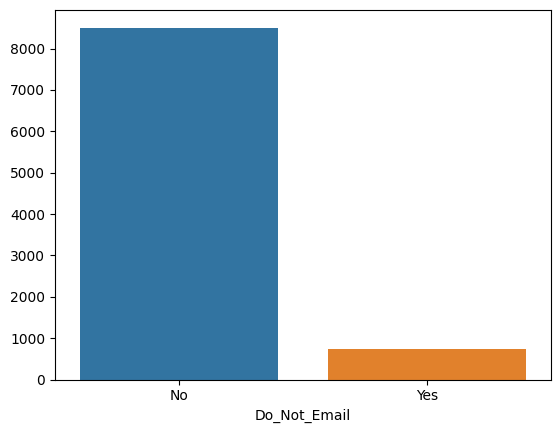

In [6853]:
sns.barplot(x=bn.index, y=bn.values)

In [6854]:
bn = data.Do_Not_Call.value_counts()
bn

Do_Not_Call
No     9238
Yes       2
Name: count, dtype: int64

<Axes: xlabel='Do_Not_Call'>

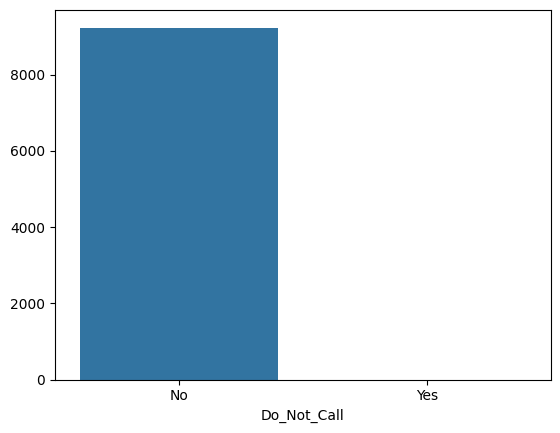

In [6855]:
sns.barplot(x=bn.index, y=bn.values)

In [6856]:
data.Lead_Number.value_counts()

Lead_Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64

In [6857]:
data.Asymmetrique_Activity_Index.value_counts()

Asymmetrique_Activity_Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [6858]:
data.Free_Copy_Mastering_The_Interview.value_counts()

Free_Copy_Mastering_The_Interview
No     6352
Yes    2888
Name: count, dtype: int64

### Last_Notable_Activity 

In [6859]:
data.Last_Notable_Activity .value_counts()

Last_Notable_Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

<Axes: xlabel='Last_Notable_Activity'>

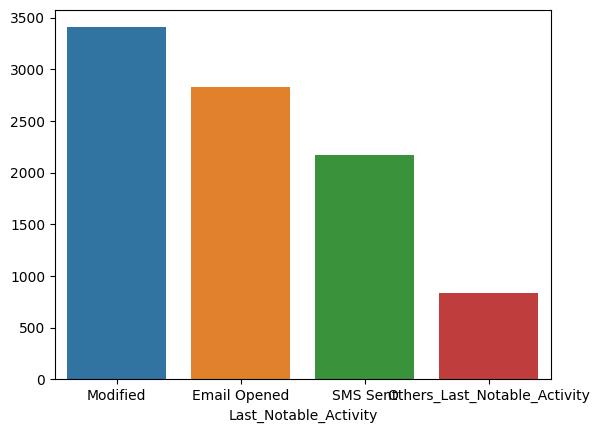

In [6860]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Last_Notable_Activity'
    return data
data = group_low_value_counts(data, column_name = 'Last_Notable_Activity', threshold = 700)
bn = data.Last_Notable_Activity.value_counts()
sns.barplot(x = bn.index, y = bn.values)

### Lead source

In [6861]:
data.Lead_Source.value_counts()

Lead_Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [6862]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Lead_Source'
    return data
data = group_low_value_counts(data, column_name = 'Lead_Source', threshold = 700)
bn = data.Lead_Source.value_counts()
bn
# sns.barplot(x = bn.index, y = bn.values)

Lead_Source
Google                2868
Direct Traffic        2543
Olark Chat            1755
Organic Search        1154
Others_Lead_Source     884
Name: count, dtype: int64

<Axes: xlabel='Lead_Source'>

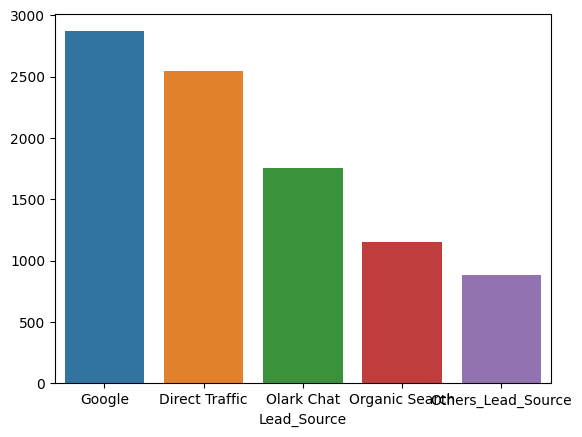

In [6863]:
sns.barplot(x = bn.index, y = bn.values)

### Lead origin

In [6864]:
data.Lead_Origin.value_counts()

Lead_Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [6865]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Lead_Origin'
    return data
data = group_low_value_counts(data, column_name = 'Lead_Origin', threshold = 700)
bn = data.Lead_Origin.value_counts()
bn

Lead_Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Others_Lead_Origin           56
Name: count, dtype: int64

<Axes: xlabel='Lead_Origin'>

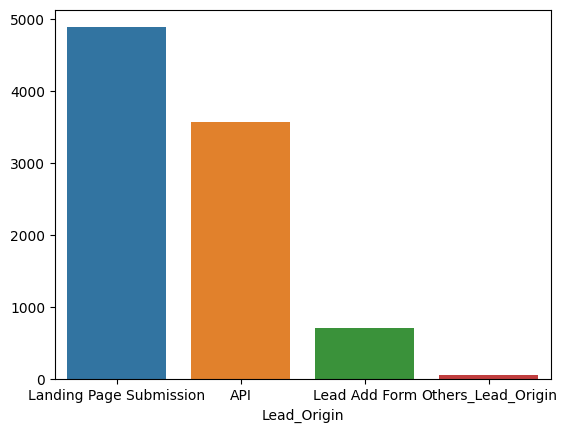

In [6866]:
sns.barplot(x = bn.index, y = bn.values)

### Last activity

In [6867]:
data.Last_Activity.value_counts()

Last_Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [6868]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Last_Activity'
    return data
data = group_low_value_counts(data, column_name = 'Last_Activity', threshold = 1000)
bn = data.Last_Activity.value_counts()
bn


Last_Activity
Email Opened            3437
Others_Last_Activity    2955
SMS Sent                2745
Name: count, dtype: int64

<Axes: xlabel='Last_Activity'>

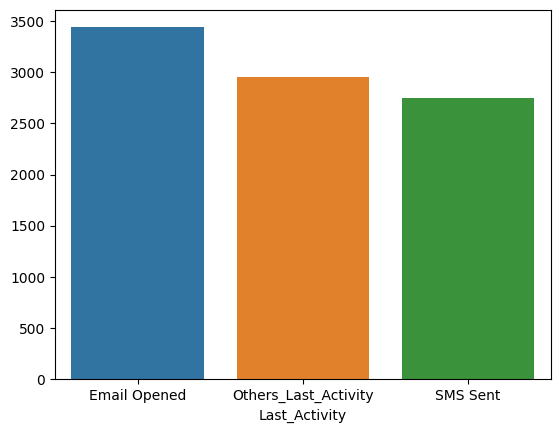

In [6869]:
sns.barplot(x = bn.index, y = bn.values)

### Specialization

In [6870]:
data.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [6871]:
def group_low_value_counts(data, column_name, threshold = 600):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Specialization'
    return data
data = group_low_value_counts(data, column_name = 'Specialization', threshold = 600)
bn = data.Specialization.value_counts()
bn

Specialization
Others_Specialization        3198
Finance Management            976
Human Resource Management     848
Marketing Management          838
Name: count, dtype: int64

<Axes: xlabel='Specialization'>

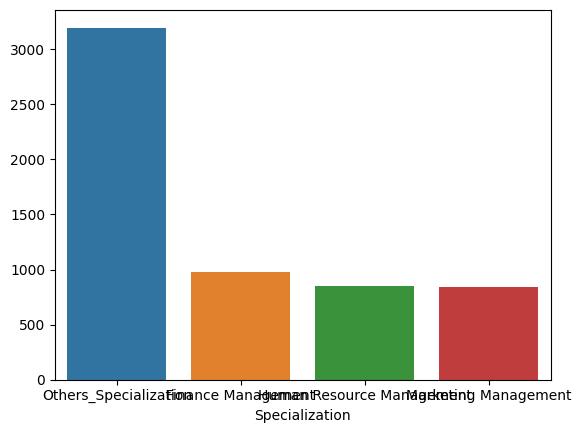

In [6872]:

sns.barplot(x = bn.index, y = bn.values)

### How_did_you_hear_about_X_Education

In [6873]:
data.How_did_you_hear_about_X_Education.value_counts()

How_did_you_hear_about_X_Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: count, dtype: int64

In [6874]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_How_did_you_hear_about_X_Education'
    return data
data = group_low_value_counts(data, column_name = 'How_did_you_hear_about_X_Education', threshold = 700)
bn = data.How_did_you_hear_about_X_Education.value_counts()
bn

How_did_you_hear_about_X_Education
Others_How_did_you_hear_about_X_Education    1182
Online Search                                 808
Name: count, dtype: int64

<Axes: xlabel='How_did_you_hear_about_X_Education'>

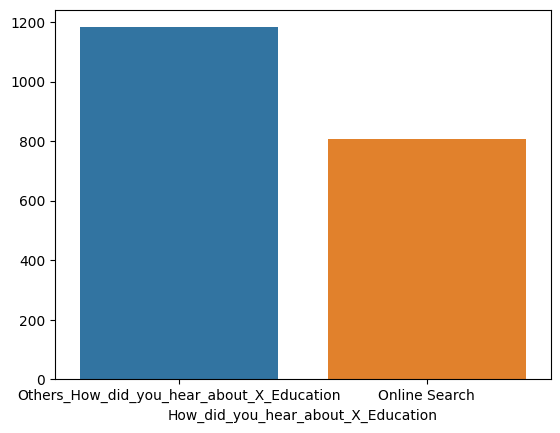

In [6875]:
sns.barplot(x = bn.index, y = bn.values)

### Current occupation

In [6876]:
data.Current_Occupation.value_counts()

Current_Occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [6877]:
def group_low_value_counts(data, column_name, threshold = 1000):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Current_Occupation'
    return data
data = group_low_value_counts(data, column_name = 'Current_Occupation', threshold = 1000)
bn = data.Current_Occupation.value_counts()
bn

Current_Occupation
Unemployed                   5600
Others_Current_Occupation     950
Name: count, dtype: int64

<Axes: xlabel='Current_Occupation'>

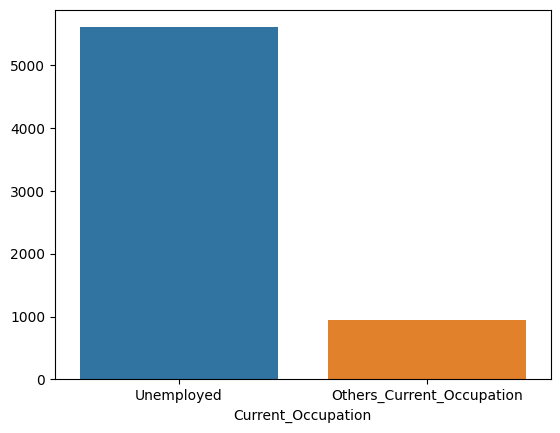

In [6878]:

sns.barplot(x = bn.index, y = bn.values)

### Tag

In [6879]:
data.Tags.value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [6880]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Tags'
    return data
data = group_low_value_counts(data, column_name = 'Tags', threshold = 700)
bn = data.Tags.value_counts()
bn

Tags
Others_Tags                            2612
Will revert after reading the email    2072
Ringing                                1203
Name: count, dtype: int64

<Axes: xlabel='Tags'>

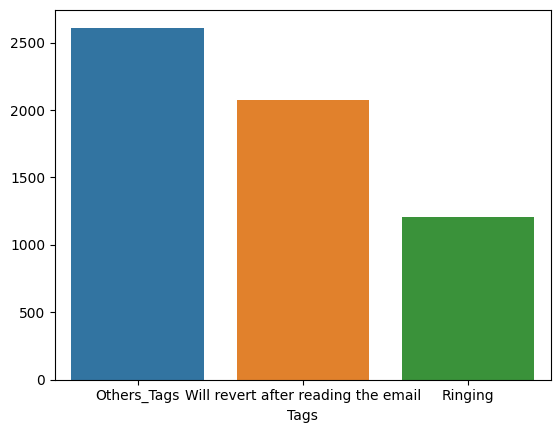

In [6881]:

sns.barplot(x = bn.index, y = bn.values)

### Lead quality

In [6882]:
data.Lead_Quality.value_counts()

Lead_Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [6883]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Lead_Quality'
    return data
data = group_low_value_counts(data, column_name = 'Lead_Quality', threshold = 700)
bn = data.Lead_Quality.value_counts()
bn

Lead_Quality
Others_Lead_Quality    1821
Might be               1560
Not Sure               1092
Name: count, dtype: int64

<Axes: xlabel='Lead_Quality'>

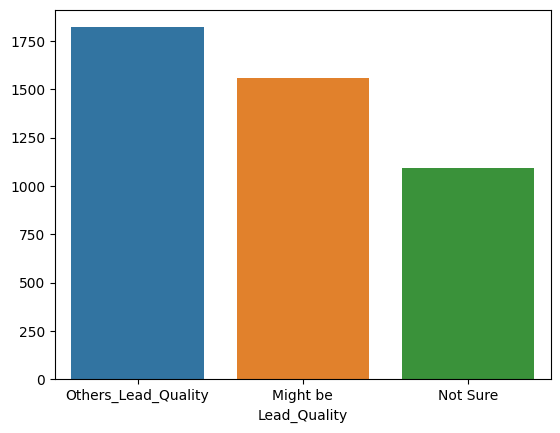

In [6884]:
sns.barplot(x = bn.index, y = bn.values)

### Lead profile

In [6885]:
data.Lead_Profile.value_counts()


Lead_Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [6886]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Lead_Profile'
    return data
data = group_low_value_counts(data, column_name = 'Lead_Profile', threshold = 700)

In [6887]:
bn = data.Lead_Profile.value_counts()
bn

Lead_Profile
Potential Lead         1613
Others_Lead_Profile     772
Name: count, dtype: int64

<Axes: xlabel='Lead_Profile'>

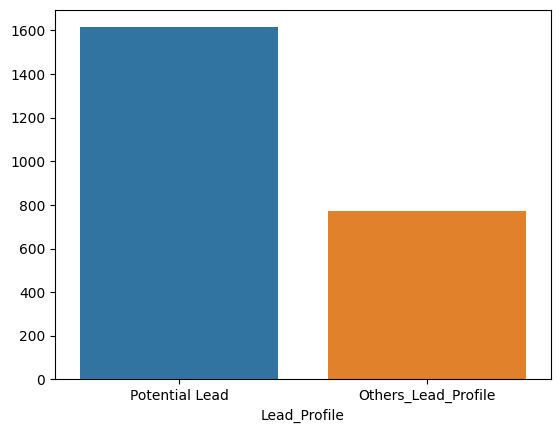

In [6888]:
sns.barplot(x = bn.index, y = bn.values)

### City

In [6889]:
data.City.value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [6890]:
def group_low_value_counts(data, column_name, threshold = 2000):
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_City'

    return data

data = group_low_value_counts(data, 'City', threshold=2000)

In [6891]:
bn = data.City.value_counts()
bn

City
Mumbai         3222
Others_City    2349
Name: count, dtype: int64

<Axes: xlabel='City'>

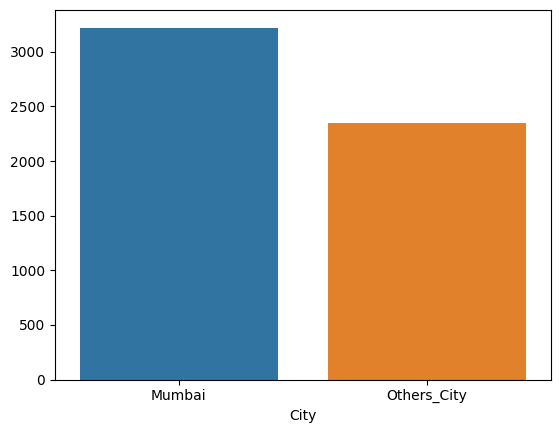

In [6892]:
sns.barplot(x=bn.index, y=bn.values)

### Country

In [6893]:
data.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [6894]:
def group_low_value_counts(data, column_name, threshold=700):
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Country'

    return data

data = group_low_value_counts(data, 'Country', threshold=700)

In [6895]:
bn = data.Country.value_counts()
bn

Country
India             6492
Others_Country     287
Name: count, dtype: int64

<Axes: xlabel='Country'>

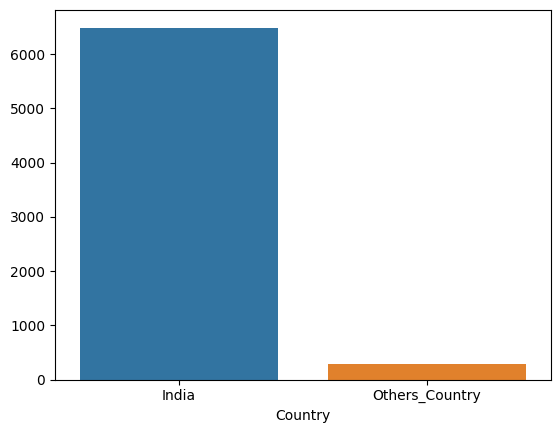

In [6896]:
sns.barplot(x=bn.index, y=bn.values)

### Dropping all skewed variable

In [6897]:
columns_to_drop = ['Prospect_ID','Update_on_DM_Content', 'Update_on_Supply_Chain_Content', 'Receive_More_Updates', 'Through_Recommendations', 'Digital_Advertisement', 'Search', 'Matters_Most_Choosing_Course', 'Newspaper', 'X_Education_Forums', 'Do_Not_Call', 'Newspaper_Article', 'Agree_to_Pay_Cheque', 'Do_Not_Email', 'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Index', 'Lead_Origin', 'Current_Occupation','Magazine', 'Free_Copy_Mastering_The_Interview', 'Country']
data = data.drop(columns_to_drop, axis=1)

In [6898]:
data.columns

Index(['Lead_Number', 'Lead_Source', 'Converted', 'Total_Visits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Specialization', 'How_did_you_hear_about_X_Education', 'Tags',
       'Lead_Quality', 'Lead_Profile', 'City', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score', 'Last_Notable_Activity'],
      dtype='object')

In [6899]:
data.shape

(9240, 16)

In [6900]:
data.head()

,Lead_Number,Lead_Source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,How_did_you_hear_about_X_Education,Tags,Lead_Quality,Lead_Profile,City,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Last_Notable_Activity
0,660737,Olark Chat,0,0.0,0,0.0,Others_Last_Activity,NaN,NaN,Others_Tags,Others_Lead_Quality,NaN,NaN,15.0,15.0,Modified
1,660728,Organic Search,0,5.0,674,2.5,Email Opened,NaN,NaN,Ringing,NaN,NaN,NaN,15.0,15.0,Email Opened
2,660727,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others_Specialization,NaN,Will revert after reading the email,Might be,Potential Lead,Mumbai,14.0,20.0,Email Opened
3,660719,Direct Traffic,0,1.0,305,1.0,Others_Last_Activity,Others_Specialization,Others_How_did_you_hear_about_X_Education,Ringing,Not Sure,NaN,Mumbai,13.0,17.0,Modified
4,660681,Google,1,2.0,1428,1.0,Others_Last_Activity,NaN,Others_How_did_you_hear_about_X_Education,Will revert after reading the email,Might be,NaN,Mumbai,15.0,18.0,Modified


### Finding the categorical variable containing missing values

In [6901]:
categorical_missing_values = [var for var in data.columns if data[var].isnull().sum() != 0]
print (data[categorical_missing_values].isnull().sum())

Lead_Source                             36
Total_Visits                           137
Page_Views_Per_Visit                   137
Last_Activity                          103
Specialization                        3380
How_did_you_hear_about_X_Education    7250
Tags                                  3353
Lead_Quality                          4767
Lead_Profile                          6855
City                                  3669
Asymmetrique_Activity_Score           4218
Asymmetrique_Profile_Score            4218
dtype: int64


In [6902]:
data[categorical_missing_values].columns

Index(['Lead_Source', 'Total_Visits', 'Page_Views_Per_Visit', 'Last_Activity',
       'Specialization', 'How_did_you_hear_about_X_Education', 'Tags',
       'Lead_Quality', 'Lead_Profile', 'City', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score'],
      dtype='object')

In [6903]:
data[categorical_missing_values].head(10)

,Lead_Source,Total_Visits,Page_Views_Per_Visit,Last_Activity,Specialization,How_did_you_hear_about_X_Education,Tags,Lead_Quality,Lead_Profile,City,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score
0,Olark Chat,0.0,0.0,Others_Last_Activity,NaN,NaN,Others_Tags,Others_Lead_Quality,NaN,NaN,15.0,15.0
1,Organic Search,5.0,2.5,Email Opened,NaN,NaN,Ringing,NaN,NaN,NaN,15.0,15.0
2,Direct Traffic,2.0,2.0,Email Opened,Others_Specialization,NaN,Will revert after reading the email,Might be,Potential Lead,Mumbai,14.0,20.0
3,Direct Traffic,1.0,1.0,Others_Last_Activity,Others_Specialization,Others_How_did_you_hear_about_X_Education,Ringing,Not Sure,NaN,Mumbai,13.0,17.0
4,Google,2.0,1.0,Others_Last_Activity,NaN,Others_How_did_you_hear_about_X_Education,Will revert after reading the email,Might be,NaN,Mumbai,15.0,18.0
5,Olark Chat,0.0,0.0,Others_Last_Activity,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0
6,Google,2.0,2.0,Email Opened,Others_Specialization,Online Search,Will revert after reading the email,Others_Lead_Quality,Potential Lead,Mumbai,14.0,20.0
7,Olark Chat,0.0,0.0,Others_Last_Activity,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.0
8,Direct Traffic,2.0,2.0,Email Opened,Others_Specialization,NaN,NaN,NaN,NaN,Others_City,14.0,14.0
9,Google,4.0,4.0,Email Opened,Finance Management,Others_How_did_you_hear_about_X_Education,NaN,NaN,NaN,Mumbai,13.0,16.0


In [6904]:
# # Assuming 'df' is your DataFrame containing the columns mentioned
# columns_to_fill_with_zero = ['Lead_Source', 'Total_Visits', 'Page_Views_Per_Visit', 'Last_Activity',
#                              'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
#                              'Tags', 'Lead_Quality', 'Lead_Profile', 'City',
#                              'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score']

# # Fill missing values in the specified columns with 0
# df[columns_to_fill_with_zero] = df[columns_to_fill_with_zero].fillna(0)

# # Display the DataFrame after filling missing values with 0
# print(df)


In [6905]:
data.isnull().sum()


Lead_Number                              0
Lead_Source                             36
Converted                                0
Total_Visits                           137
Total_Time_Spent_on_Website              0
Page_Views_Per_Visit                   137
Last_Activity                          103
Specialization                        3380
How_did_you_hear_about_X_Education    7250
Tags                                  3353
Lead_Quality                          4767
Lead_Profile                          6855
City                                  3669
Asymmetrique_Activity_Score           4218
Asymmetrique_Profile_Score            4218
Last_Notable_Activity                    0
dtype: int64

In [6906]:
data.head(10)

,Lead_Number,Lead_Source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,How_did_you_hear_about_X_Education,Tags,Lead_Quality,Lead_Profile,City,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Last_Notable_Activity
0,660737,Olark Chat,0,0.0,0,0.0,Others_Last_Activity,NaN,NaN,Others_Tags,Others_Lead_Quality,NaN,NaN,15.0,15.0,Modified
1,660728,Organic Search,0,5.0,674,2.5,Email Opened,NaN,NaN,Ringing,NaN,NaN,NaN,15.0,15.0,Email Opened
2,660727,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others_Specialization,NaN,Will revert after reading the email,Might be,Potential Lead,Mumbai,14.0,20.0,Email Opened
3,660719,Direct Traffic,0,1.0,305,1.0,Others_Last_Activity,Others_Specialization,Others_How_did_you_hear_about_X_Education,Ringing,Not Sure,NaN,Mumbai,13.0,17.0,Modified
4,660681,Google,1,2.0,1428,1.0,Others_Last_Activity,NaN,Others_How_did_you_hear_about_X_Education,Will revert after reading the email,Might be,NaN,Mumbai,15.0,18.0,Modified
5,660680,Olark Chat,0,0.0,0,0.0,Others_Last_Activity,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,Modified
6,660673,Google,1,2.0,1640,2.0,Email Opened,Others_Specialization,Online Search,Will revert after reading the email,Others_Lead_Quality,Potential Lead,Mumbai,14.0,20.0,Modified
7,660664,Olark Chat,0,0.0,0,0.0,Others_Last_Activity,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.0,Modified
8,660624,Direct Traffic,0,2.0,71,2.0,Email Opened,Others_Specialization,NaN,NaN,NaN,NaN,Others_City,14.0,14.0,Email Opened
9,660616,Google,0,4.0,58,4.0,Email Opened,Finance Management,Others_How_did_you_hear_about_X_Education,NaN,NaN,NaN,Mumbai,13.0,16.0,Email Opened


### Removing rows with Nan value

In [6907]:

data.dropna(inplace=True)
# Remove rows where all values are NaN in-place
data.dropna(how='all', inplace=True)

In [6908]:
data.head(5)

,Lead_Number,Lead_Source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,How_did_you_hear_about_X_Education,Tags,Lead_Quality,Lead_Profile,City,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Last_Notable_Activity
6,660673,Google,1,2.0,1640,2.0,Email Opened,Others_Specialization,Online Search,Will revert after reading the email,Others_Lead_Quality,Potential Lead,Mumbai,14.0,20.0,Modified
22,660471,Google,1,1.0,1013,1.0,Others_Last_Activity,Others_Specialization,Others_How_did_you_hear_about_X_Education,Will revert after reading the email,Others_Lead_Quality,Potential Lead,Mumbai,15.0,20.0,Modified
27,660424,Google,1,6.0,1315,6.0,Email Opened,Others_Specialization,Online Search,Will revert after reading the email,Others_Lead_Quality,Potential Lead,Mumbai,15.0,19.0,Email Opened
37,660267,Google,1,5.0,563,5.0,Email Opened,Finance Management,Others_How_did_you_hear_about_X_Education,Will revert after reading the email,Others_Lead_Quality,Potential Lead,Mumbai,13.0,20.0,Email Opened
39,660236,Google,1,4.0,25,4.0,Email Opened,Others_Specialization,Others_How_did_you_hear_about_X_Education,Will revert after reading the email,Others_Lead_Quality,Potential Lead,Others_City,14.0,19.0,Email Opened


### Creating dummy variables for categorical variables

### Lead sources dummy variable

In [6909]:
lead_source_dummy = pd.get_dummies(data.Lead_Source, drop_first = True)
lead_source_dummy = lead_source_dummy.astype(int)
lead_source_dummy

,Google,Olark Chat,Organic Search,Others_Lead_Source
6,1,0,0,0
22,1,0,0,0
27,1,0,0,0
37,1,0,0,0
39,1,0,0,0
...,...,...,...,...
9210,0,0,0,0
9211,0,0,0,0
9222,1,0,0,0
9227,1,0,0,0


In [6910]:
# and the column mapping dictionary is as follows:

column_mapping = {
    'Google': 'google',
    'Olark Chat': 'olark_chat',
    'Organic Search': 'organic_search',
    'Others_Lead_Source': 'others_lead_source'
}

# Rename the columns using the mapping
lead_source_dummy.rename(columns=column_mapping, inplace=True)


In [6911]:
lead_source_dummy

,google,olark_chat,organic_search,others_lead_source
6,1,0,0,0
22,1,0,0,0
27,1,0,0,0
37,1,0,0,0
39,1,0,0,0
...,...,...,...,...
9210,0,0,0,0
9211,0,0,0,0
9222,1,0,0,0
9227,1,0,0,0


### Last activity dummy variable

In [6912]:
Last_Activity_dummy = pd.get_dummies(data.Last_Activity, drop_first = True)
Last_Activity_dummy = Last_Activity_dummy.astype(int)
Last_Activity_dummy

,Others_Last_Activity,SMS Sent
6,0,0
22,1,0
27,0,0
37,0,0
39,0,0
...,...,...
9210,1,0
9211,0,1
9222,0,1
9227,0,0


In [6913]:
# and the column mapping dictionary is as follows:

column_mapping = {
    'Others_Last_Activity': 'others_Last_Activity',
    'SMS Sent': 'sms_sent'
}

# Rename the columns using the mapping
Last_Activity_dummy.rename(columns=column_mapping, inplace=True)

In [6914]:
Last_Activity_dummy

,others_Last_Activity,sms_sent
6,0,0
22,1,0
27,0,0
37,0,0
39,0,0
...,...,...
9210,1,0
9211,0,1
9222,0,1
9227,0,0


### Specialization dummy variables

In [6915]:
Specialization_dummy = pd.get_dummies(data.Specialization, drop_first = True)
Specialization_dummy = Specialization_dummy.astype(int)
Specialization_dummy

,Human Resource Management,Marketing Management,Others_Specialization
6,0,0,1
22,0,0,1
27,0,0,1
37,0,0,0
39,0,0,1
...,...,...,...
9210,0,0,1
9211,0,0,1
9222,0,0,1
9227,0,0,1


In [6916]:
column_mapping = {
    'Human Resource Management': 'human_resource_management',
    'Marketing Management': 'marketing_management'
}

# Rename the columns using the mapping
Specialization_dummy.rename(columns=column_mapping, inplace=True)

In [6917]:
Specialization_dummy

,human_resource_management,marketing_management,Others_Specialization
6,0,0,1
22,0,0,1
27,0,0,1
37,0,0,0
39,0,0,1
...,...,...,...
9210,0,0,1
9211,0,0,1
9222,0,0,1
9227,0,0,1


### How did you hear about X education dummy variable

In [6918]:
How_did_you_hear_about_X_Education_dummy = pd.get_dummies(data.How_did_you_hear_about_X_Education, drop_first = True)
How_did_you_hear_about_X_Education_dummy = How_did_you_hear_about_X_Education_dummy.astype(int)
How_did_you_hear_about_X_Education_dummy

,Others_How_did_you_hear_about_X_Education
6,0
22,1
27,0
37,1
39,1
...,...
9210,0
9211,0
9222,0
9227,0


In [6919]:
data.How_did_you_hear_about_X_Education.value_counts()

How_did_you_hear_about_X_Education
Others_How_did_you_hear_about_X_Education    169
Online Search                                132
Name: count, dtype: int64

### Tag dummy variables


In [6920]:
Tags_dummy = pd.get_dummies(data.Tags, drop_first = True)
Tags_dummy = Tags_dummy.astype(int)
Tags_dummy

,Ringing,Will revert after reading the email
6,0,1
22,0,1
27,0,1
37,0,1
39,0,1
...,...,...
9210,0,1
9211,0,1
9222,0,1
9227,0,1


In [6921]:
column_mapping = {
    'Ringing': 'ringing',
    'Will revert after reading the email': 'will_revert_after_reading_the_email'
}

# Rename the columns using the mapping
Tags_dummy.rename(columns=column_mapping, inplace=True)

In [6922]:
Tags_dummy

,ringing,will_revert_after_reading_the_email
6,0,1
22,0,1
27,0,1
37,0,1
39,0,1
...,...,...
9210,0,1
9211,0,1
9222,0,1
9227,0,1


## Lead quality dummy variables

In [6923]:
Lead_Quality_dummy = pd.get_dummies(data.Lead_Quality, drop_first = True)
Lead_Quality_dummy = Lead_Quality_dummy.astype(int)
Lead_Quality_dummy

,Not Sure,Others_Lead_Quality
6,0,1
22,0,1
27,0,1
37,0,1
39,0,1
...,...,...
9210,0,0
9211,0,0
9222,0,1
9227,0,0


In [6924]:
column_mapping = {
    'Not Sure': 'not_sure',
    'Others_Lead_Quality': 'others_lead_quality'
}

# Rename the columns using the mapping
Lead_Quality_dummy.rename(columns=column_mapping, inplace=True)

In [6925]:
Lead_Quality_dummy

,not_sure,others_lead_quality
6,0,1
22,0,1
27,0,1
37,0,1
39,0,1
...,...,...
9210,0,0
9211,0,0
9222,0,1
9227,0,0


### Lead profile dummy variables 

In [6926]:
#'Lead_Profile', 'City', 'Last_Notable_Activity'
Lead_Profile_dummy = pd.get_dummies(data.Lead_Profile, drop_first = True)
Lead_Profile_dummy = Lead_Profile_dummy.astype(int)
Lead_Profile_dummy

,Potential Lead
6,1
22,1
27,1
37,1
39,1
...,...
9210,1
9211,0
9222,1
9227,1


In [6927]:
column_mapping = {
    'Potential Lead': 'potential_lead',
}

# Rename the columns using the mapping
Lead_Profile_dummy.rename(columns=column_mapping, inplace=True)

In [6928]:
Lead_Profile_dummy

,potential_lead
6,1
22,1
27,1
37,1
39,1
...,...
9210,1
9211,0
9222,1
9227,1


### city dummy variables

In [6929]:
City_dummy = pd.get_dummies(data.City, drop_first = True)
City_dummy = City_dummy.astype(int)
City_dummy

,Others_City
6,0
22,0
27,0
37,0
39,1
...,...
9210,0
9211,0
9222,1
9227,0


### Last notable activity dummy variable

In [6930]:
Last_Notable_Activity_dummy = pd.get_dummies(data.Last_Notable_Activity, drop_first = True)
Last_Notable_Activity_dummy = Last_Notable_Activity_dummy.astype(int)
Last_Notable_Activity_dummy

,Modified,Others_Last_Notable_Activity,SMS Sent
6,1,0,0
22,1,0,0
27,0,0,0
37,0,0,0
39,0,0,0
...,...,...,...
9210,1,0,0
9211,0,0,1
9222,1,0,0
9227,0,0,0


In [6931]:
column_mapping = {
    'Modified': 'modified',
    'Others_Last_Notable_Activity': 'others_last_notable_activity',
    'SMS Sent': 'SMS_Sent_Last_Notable_Activity',
}

# Rename the columns using the mapping
Last_Notable_Activity_dummy.rename(columns=column_mapping, inplace=True)

In [6932]:
Last_Notable_Activity_dummy

,modified,others_last_notable_activity,SMS_Sent_Last_Notable_Activity
6,1,0,0
22,1,0,0
27,0,0,0
37,0,0,0
39,0,0,0
...,...,...,...
9210,1,0,0
9211,0,0,1
9222,1,0,0
9227,0,0,0


### Dropping the variables

In [6933]:
columns_to_drop = ['Lead_Source',  'Last_Activity',
                    'Specialization', 'How_did_you_hear_about_X_Education',
                   'Tags', 'Lead_Quality', 'Lead_Profile', 'City', 'Last_Notable_Activity', 'Lead_Number']
data = data.drop(columns=columns_to_drop)

### Merging all the variables

In [6934]:
dfs_to_concat = [lead_source_dummy, data, Last_Notable_Activity_dummy, City_dummy, Lead_Profile_dummy, Lead_Quality_dummy, Tags_dummy, How_did_you_hear_about_X_Education_dummy, Specialization_dummy, Last_Activity_dummy]

# Concatenate the DataFrames along the columns (axis=1)
df = pd.concat(dfs_to_concat, axis=1)

In [6935]:
df.head(5)

,google,olark_chat,organic_search,others_lead_source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,...,not_sure,others_lead_quality,ringing,will_revert_after_reading_the_email,Others_How_did_you_hear_about_X_Education,human_resource_management,marketing_management,Others_Specialization,others_Last_Activity,sms_sent
6,1,0,0,0,1,2.0,1640,2.0,14.0,20.0,...,0,1,0,1,0,0,0,1,0,0
22,1,0,0,0,1,1.0,1013,1.0,15.0,20.0,...,0,1,0,1,1,0,0,1,1,0
27,1,0,0,0,1,6.0,1315,6.0,15.0,19.0,...,0,1,0,1,0,0,0,1,0,0
37,1,0,0,0,1,5.0,563,5.0,13.0,20.0,...,0,1,0,1,1,0,0,0,0,0
39,1,0,0,0,1,4.0,25,4.0,14.0,19.0,...,0,1,0,1,1,0,0,1,0,0


In [6936]:
df.head(10)

,google,olark_chat,organic_search,others_lead_source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,...,not_sure,others_lead_quality,ringing,will_revert_after_reading_the_email,Others_How_did_you_hear_about_X_Education,human_resource_management,marketing_management,Others_Specialization,others_Last_Activity,sms_sent
6,1,0,0,0,1,2.0,1640,2.0,14.0,20.0,...,0,1,0,1,0,0,0,1,0,0
22,1,0,0,0,1,1.0,1013,1.0,15.0,20.0,...,0,1,0,1,1,0,0,1,1,0
27,1,0,0,0,1,6.0,1315,6.0,15.0,19.0,...,0,1,0,1,0,0,0,1,0,0
37,1,0,0,0,1,5.0,563,5.0,13.0,20.0,...,0,1,0,1,1,0,0,0,0,0
39,1,0,0,0,1,4.0,25,4.0,14.0,19.0,...,0,1,0,1,1,0,0,1,0,0
41,0,0,1,0,0,7.0,38,7.0,13.0,18.0,...,1,0,0,0,1,0,0,1,1,0
56,0,0,0,1,1,13.0,436,13.0,15.0,13.0,...,0,1,0,0,0,0,0,1,1,0
60,1,0,0,0,0,4.0,213,4.0,13.0,16.0,...,1,0,0,0,1,0,0,1,1,0
76,1,0,0,0,1,6.0,595,3.0,14.0,20.0,...,0,1,0,1,1,0,0,1,0,0
135,1,0,0,0,1,5.0,1091,5.0,13.0,20.0,...,0,1,0,1,0,0,0,0,1,0


### Finding columns with numeric values

In [6937]:
# Assuming 'data' is the DataFrame containing your dataset
numeric_data = [var for var in data.columns if data[var].dtype != 'O'] # dtype != 'O' selects non-object columns

print('The total non-categorical variables are {}'.format(len(numeric_data)))
print(numeric_data)


The total non-categorical variables are 6
['Converted', 'Total_Visits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score']


In [6938]:
df[numeric_data].head(5)

,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score
6,1,2.0,1640,2.0,14.0,20.0
22,1,1.0,1013,1.0,15.0,20.0
27,1,6.0,1315,6.0,15.0,19.0
37,1,5.0,563,5.0,13.0,20.0
39,1,4.0,25,4.0,14.0,19.0


### Data normalization

In [6939]:
scaler = MinMaxScaler()
normalized_data = ['Lead_Number', 'Total_Visits', 'Total_Time_Spent_on_Website',
                   'Page_Views_Per_Visit', 'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score', 'Converted']
df[numeric_data] = scaler.fit_transform(df[numeric_data])
df

,google,olark_chat,organic_search,others_lead_source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,...,not_sure,others_lead_quality,ringing,will_revert_after_reading_the_email,Others_How_did_you_hear_about_X_Education,human_resource_management,marketing_management,Others_Specialization,others_Last_Activity,sms_sent
6,1,0,0,0,1.0,0.023810,0.784689,0.083333,0.666667,1.000000,...,0,1,0,1,0,0,0,1,0,0
22,1,0,0,0,1.0,0.000000,0.484689,0.000000,0.833333,1.000000,...,0,1,0,1,1,0,0,1,1,0
27,1,0,0,0,1.0,0.119048,0.629187,0.416667,0.833333,0.857143,...,0,1,0,1,0,0,0,1,0,0
37,1,0,0,0,1.0,0.095238,0.269378,0.333333,0.500000,1.000000,...,0,1,0,1,1,0,0,0,0,0
39,1,0,0,0,1.0,0.071429,0.011962,0.250000,0.666667,0.857143,...,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,0,0,0,0,1.0,0.071429,0.443541,0.250000,0.666667,1.000000,...,0,0,0,1,0,0,0,1,1,0
9211,0,0,0,0,1.0,0.071429,0.532057,0.250000,0.833333,0.285714,...,0,0,0,1,0,0,0,1,0,1
9222,1,0,0,0,0.0,0.119048,0.109091,0.416667,0.833333,0.428571,...,0,1,0,1,0,0,0,1,0,1
9227,1,0,0,0,1.0,0.095238,0.613876,0.055833,0.833333,1.000000,...,0,0,0,1,0,0,0,1,0,0


### Understanding data shape 

In [6940]:
print(df.shape)



(301, 25)


### Understanding shape of new dataset

In [6941]:
df.head(10)

,google,olark_chat,organic_search,others_lead_source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,...,not_sure,others_lead_quality,ringing,will_revert_after_reading_the_email,Others_How_did_you_hear_about_X_Education,human_resource_management,marketing_management,Others_Specialization,others_Last_Activity,sms_sent
6,1,0,0,0,1.0,0.023810,0.784689,0.083333,0.666667,1.000000,...,0,1,0,1,0,0,0,1,0,0
22,1,0,0,0,1.0,0.000000,0.484689,0.000000,0.833333,1.000000,...,0,1,0,1,1,0,0,1,1,0
27,1,0,0,0,1.0,0.119048,0.629187,0.416667,0.833333,0.857143,...,0,1,0,1,0,0,0,1,0,0
37,1,0,0,0,1.0,0.095238,0.269378,0.333333,0.500000,1.000000,...,0,1,0,1,1,0,0,0,0,0
39,1,0,0,0,1.0,0.071429,0.011962,0.250000,0.666667,0.857143,...,0,1,0,1,1,0,0,1,0,0
41,0,0,1,0,0.0,0.142857,0.018182,0.500000,0.500000,0.714286,...,1,0,0,0,1,0,0,1,1,0
56,0,0,0,1,1.0,0.285714,0.208612,1.000000,0.833333,0.000000,...,0,1,0,0,0,0,0,1,1,0
60,1,0,0,0,0.0,0.071429,0.101914,0.250000,0.500000,0.428571,...,1,0,0,0,1,0,0,1,1,0
76,1,0,0,0,1.0,0.119048,0.284689,0.166667,0.666667,1.000000,...,0,1,0,1,1,0,0,1,0,0
135,1,0,0,0,1.0,0.095238,0.522010,0.333333,0.500000,1.000000,...,0,1,0,1,0,0,0,0,1,0


### Splitting into train and test

In [6942]:
train_data, test_data = train_test_split(df, train_size = 0.7, random_state = 100)
print(train_data.shape)
print(test_data.shape)

(210, 25)
(91, 25)


### Splitting train data into X and Y

In [6943]:
y_train = train_data.pop('Converted')
x_train = train_data
print(x_train.shape)

(210, 24)


In [6944]:
# import statsmodels.api as sm
# x_train_sm = sm.add_constant(x_train)
# logit_model=sm.Logit(y_train,x_train)
# result=logit_model.fit()
# print(result.summary())
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  210
Model:                            GLM   Df Residuals:                      185
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.679
Date:                Fri, 04 Aug 2023   Deviance:                       43.358
Time:                        07:49:59   Pearson chi2:                     74.6
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6069
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                       -10.1444      4.070     -2.493      0.013     -18.121      -2.167
google                                        1.2143      1.443      0.841      0.400      -1.615       4.043
olark_chat                                   16.3770   2.21e+04      0.001      0.999   -4.33e+04    4.33e+04
organic_search                               -0.1747      1.872     -0.093      0.926      -3.845       3.495
others_lead_source                           25.5234   1.92e+04      0.001      0.999   -3.77e+04    3.77e+04
Total_Visits                                  1.9718      6.441      0.306      0.760     -10.653      14.596
Total_Time_Spent_on_Website                  11.5559      3.597      3.212      0.001       4.505      18.607
Page_Views_Per_Visit                        -11.1638      6.749     -1.654      0.098     -24.391       2.064
Asymmetrique_Activity_Score                  14.8328      5.513      2.690      0.007       4.027      25.639
Asymmetrique_Profile_Score                   -9.0029      4.421     -2.036      0.042     -17.668      -0.338
modified                                     -3.3794      1.546     -2.186      0.029      -6.409      -0.349
others_last_notable_activity                  3.3114      4.623      0.716      0.474      -5.749      12.371
SMS_Sent_Last_Notable_Activity               -1.8943     21.012     -0.090      0.928     -43.077      39.289
Others_City                                   0.6530      1.311      0.498      0.619      -1.917       3.223
potential_lead                                9.8184      3.582      2.741      0.006       2.799      16.838
not_sure                                     -5.0070      2.444     -2.049      0.041      -9.797      -0.217
others_lead_quality                          -7.5430      3.676     -2.052      0.040     -14.748      -0.338
ringing                                      -6.7930      3.067     -2.215      0.027     -12.805      -0.781
will_revert_after_reading_the_email           8.3885      2.955      2.839      0.005       2.598      14.179
Others_How_did_you_hear_about_X_Education     4.4778      1.914      2.339      0.019       0.726       8.229
human_resource_management                     3.7084      2.003      1.852      0.064      -0.217       7.634
marketing_management                         -2.5035      1.995     -1.255      0.210      -6.414       1.407
Others_Specialization                        -0.7725      1.536     -0.503      0.615      -3.783       2.238
others_Last_Activity                          2.4027      1.958      1.227      0.220      -1.434       6.240
sms_sent                                     -0.6380     20.925     -0.030      0.976     -41.651      40.375
===

In [6945]:
x_train.columns

Index(['google', 'olark_chat', 'organic_search', 'others_lead_source',
       'Total_Visits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',
       'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score', 'modified',
       'others_last_notable_activity', 'SMS_Sent_Last_Notable_Activity',
       'Others_City', 'potential_lead', 'not_sure', 'others_lead_quality',
       'ringing', 'will_revert_after_reading_the_email',
       'Others_How_did_you_hear_about_X_Education',
       'human_resource_management', 'marketing_management',
       'Others_Specialization', 'others_Last_Activity', 'sms_sent'],
      dtype='object')

In [6946]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif


,variables,VIF
8,Asymmetrique_Profile_Score,22.75
7,Asymmetrique_Activity_Score,16.45
13,potential_lead,10.19
0,google,7.85
23,sms_sent,6.48
11,SMS_Sent_Last_Notable_Activity,6.20
15,others_lead_quality,5.18
9,modified,4.91
17,will_revert_after_reading_the_email,4.69
22,others_Last_Activity,4.45


### Dropping variable with high VIF

In [6947]:
x = x_train.drop(['Asymmetrique_Profile_Score', 'Asymmetrique_Activity_Score', 'potential_lead'], axis = 1)

In [6948]:
linear_model = LogisticRegression()
linear_model.fit(x, y_train)
recursive_feature_elimination = RFE(linear_model)
recursive_feature_elimination.n_features_to_select = 16
recursive_feature_elimination = recursive_feature_elimination.fit(x, y_train)


In [6949]:
list(zip(x.columns, recursive_feature_elimination.support_, recursive_feature_elimination.ranking_ ))

[('google', False, 6),
 ('olark_chat', False, 4),
 ('organic_search', False, 5),
 ('others_lead_source', True, 1),
 ('Total_Visits', True, 1),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', True, 1),
 ('modified', True, 1),
 ('others_last_notable_activity', True, 1),
 ('SMS_Sent_Last_Notable_Activity', True, 1),
 ('Others_City', True, 1),
 ('not_sure', True, 1),
 ('others_lead_quality', True, 1),
 ('ringing', True, 1),
 ('will_revert_after_reading_the_email', True, 1),
 ('Others_How_did_you_hear_about_X_Education', True, 1),
 ('human_resource_management', True, 1),
 ('marketing_management', True, 1),
 ('Others_Specialization', True, 1),
 ('others_Last_Activity', False, 2),
 ('sms_sent', False, 3)]

In [6950]:
col = x.columns[recursive_feature_elimination.support_]
col


Index(['others_lead_source', 'Total_Visits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'modified', 'others_last_notable_activity',
       'SMS_Sent_Last_Notable_Activity', 'Others_City', 'not_sure',
       'others_lead_quality', 'ringing', 'will_revert_after_reading_the_email',
       'Others_How_did_you_hear_about_X_Education',
       'human_resource_management', 'marketing_management',
       'Others_Specialization'],
      dtype='object')

In [6951]:
# final_data = x[col]
# final_data.head()

In [6952]:
# final_data.shape

In [6953]:
# x_train_sm = sm.add_constant(final_data)
# logit_model=sm.Logit(y_train,final_data)
# result=logit_model.fit()
# print(result.summary())
X_train_sm = sm.add_constant(x[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  210
Model:                            GLM   Df Residuals:                      193
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.948
Date:                Fri, 04 Aug 2023   Deviance:                       79.895
Time:                        07:50:00   Pearson chi2:                     364.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5322
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.9920      1.854     -1.614      0.107      -6.626       0.642
others_lead_source                           26.3821   1.15e+04      0.002      0.998   -2.25e+04    2.26e+04
Total_Visits                                  3.3520      3.092      1.084      0.278      -2.708       9.412
Total_Time_Spent_on_Website                   7.2410      1.727      4.192      0.000       3.855      10.627
Page_Views_Per_Visit                         -5.8512      2.942     -1.989      0.047     -11.617      -0.086
modified                                     -1.4720      0.749     -1.965      0.049      -2.941      -0.003
others_last_notable_activity                 -0.1048      1.334     -0.079      0.937      -2.720       2.510
SMS_Sent_Last_Notable_Activity               -0.9592      1.308     -0.733      0.463      -3.523       1.605
Others_City                                   1.2158      0.721      1.686      0.092      -0.197       2.629
not_sure                                     -2.4639      1.146     -2.149      0.032      -4.710      -0.217
others_lead_quality                          -0.7310      1.005     -0.727      0.467      -2.701       1.239
ringing                                      -2.2468      1.649     -1.363      0.173      -5.479       0.985
will_revert_after_reading_the_email           5.1029      1.103      4.626      0.000       2.941       7.265
Others_How_did_you_hear_about_X_Education     2.3528      0.920      2.559      0.011       0.551       4.155
human_resource_management                     1.6605      1.203      1.381      0.167      -0.697       4.018
marketing_management                         -0.2704      1.152     -0.235      0.814      -2.528       1.988
Others_Specialization                         0.6833      0.888      0.770      0.442      -1.057       2.424
=============================================================================================================
"""

### Final VIF

In [6954]:

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x[col].columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x[col].values,i) for i in range (x[col].shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
2,Total_Time_Spent_on_Website,3.79
3,Page_Views_Per_Visit,3.75
9,others_lead_quality,3.62
15,Others_Specialization,3.43
11,will_revert_after_reading_the_email,3.37
1,Total_Visits,2.55
12,Others_How_did_you_hear_about_X_Education,2.40
8,not_sure,2.30
4,modified,1.96
14,marketing_management,1.85


In [6955]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3093    0.003941
2016    0.992886
9084    0.171809
7767    0.971274
2311    0.996001
1116    0.999919
1973    0.962279
8642    0.922870
8730    0.947071
9132    0.000901
dtype: float64

In [6956]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.94132159e-03, 9.92885592e-01, 1.71809300e-01, 9.71274270e-01,
       9.96001302e-01, 9.99918865e-01, 9.62278651e-01, 9.22869849e-01,
       9.47071285e-01, 9.01414573e-04])

In [6957]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0.0,0.003941,3093
1,1.0,0.992886,2016
2,1.0,0.171809,9084
3,1.0,0.971274,7767
4,1.0,0.996001,2311


In [6958]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0.0,0.003941,3093,0
1,1.0,0.992886,2016,1
2,1.0,0.171809,9084,0
3,1.0,0.971274,7767,1
4,1.0,0.996001,2311,1


In [6959]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[ 45   9]
 [  6 150]]


In [6960]:
# checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9285714285714286


In [6961]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x[col].columns
vif['VIF'] = [variance_inflation_factor(x[col].values, i) for i in range(x[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total_Time_Spent_on_Website,3.79
3,Page_Views_Per_Visit,3.75
9,others_lead_quality,3.62
15,Others_Specialization,3.43
11,will_revert_after_reading_the_email,3.37
1,Total_Visits,2.55
12,Others_How_did_you_hear_about_X_Education,2.40
8,not_sure,2.30
4,modified,1.96
14,marketing_management,1.85


In [6962]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(x[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  210
Model:                            GLM   Df Residuals:                      193
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.948
Date:                Fri, 04 Aug 2023   Deviance:                       79.895
Time:                        07:50:00   Pearson chi2:                     364.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5322
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.9920      1.854     -1.614      0.107      -6.626       0.642
others_lead_source                           26.3821   1.15e+04      0.002      0.998   -2.25e+04    2.26e+04
Total_Visits                                  3.3520      3.092      1.084      0.278      -2.708       9.412
Total_Time_Spent_on_Website                   7.2410      1.727      4.192      0.000       3.855      10.627
Page_Views_Per_Visit                         -5.8512      2.942     -1.989      0.047     -11.617      -0.086
modified                                     -1.4720      0.749     -1.965      0.049      -2.941      -0.003
others_last_notable_activity                 -0.1048      1.334     -0.079      0.937      -2.720       2.510
SMS_Sent_Last_Notable_Activity               -0.9592      1.308     -0.733      0.463      -3.523       1.605
Others_City                                   1.2158      0.721      1.686      0.092      -0.197       2.629
not_sure                                     -2.4639      1.146     -2.149      0.032      -4.710      -0.217
others_lead_quality                          -0.7310      1.005     -0.727      0.467      -2.701       1.239
ringing                                      -2.2468      1.649     -1.363      0.173      -5.479       0.985
will_revert_after_reading_the_email           5.1029      1.103      4.626      0.000       2.941       7.265
Others_How_did_you_hear_about_X_Education     2.3528      0.920      2.559      0.011       0.551       4.155
human_resource_management                     1.6605      1.203      1.381      0.167      -0.697       4.018
marketing_management                         -0.2704      1.152     -0.235      0.814      -2.528       1.988
Others_Specialization                         0.6833      0.888      0.770      0.442      -1.057       2.424
=============================================================================================================
"""

In [6963]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([3.94132159e-03, 9.92885592e-01, 1.71809300e-01, 9.71274270e-01,
       9.96001302e-01, 9.99918865e-01, 9.62278651e-01, 9.22869849e-01,
       9.47071285e-01, 9.01414573e-04])

In [6964]:
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0.0,0.003941,3093,0
1,1.0,0.992886,2016,1
2,1.0,0.171809,9084,0
3,1.0,0.971274,7767,1
4,1.0,0.996001,2311,1


In [6965]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [6966]:
# sensitivity 
TP / float(TP+FN)


0.9615384615384616

In [6967]:
# specificity
TN / float(TN+FP)

0.8333333333333334

In [6968]:
#  false postive rate
FP/ float(TN+FP)

0.16666666666666666

In [6969]:
# positive predictive value 
TP / float(TP+FP)


0.9433962264150944

In [6970]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


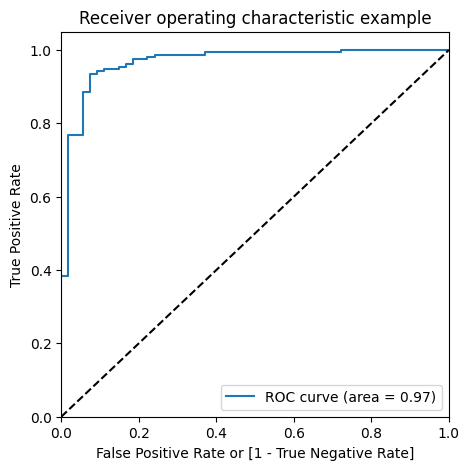

In [6971]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [6972]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.003941,3093,0,1,0,0,0,0,0,0,0,0,0
1,1.0,0.992886,2016,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.171809,9084,0,1,1,0,0,0,0,0,0,0,0
3,1.0,0.971274,7767,1,1,1,1,1,1,1,1,1,1,1
4,1.0,0.996001,2311,1,1,1,1,1,1,1,1,1,1,1


In [6973]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.742857  1.000000  0.000000
0.1   0.1  0.876190  0.993590  0.537037
0.2   0.2  0.895238  0.987179  0.629630
0.3   0.3  0.919048  0.987179  0.722222
0.4   0.4  0.928571  0.974359  0.796296
0.5   0.5  0.928571  0.961538  0.833333
0.6   0.6  0.933333  0.942308  0.907407
0.7   0.7  0.923810  0.923077  0.925926
0.8   0.8  0.895238  0.878205  0.944444
0.9   0.9  0.842857  0.807692  0.944444


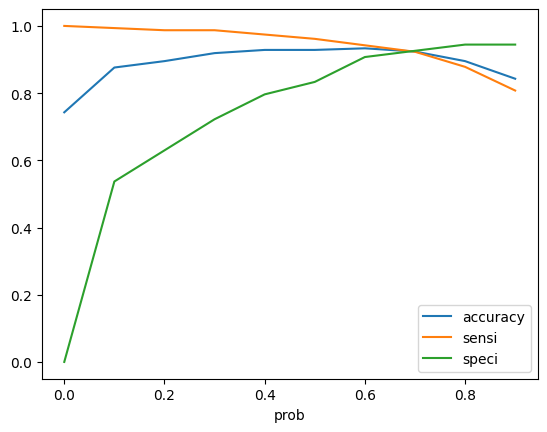

In [6974]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [6975]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.003941,3093,0,1,0,0,0,0,0,0,0,0,0,0
1,1.0,0.992886,2016,1,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.171809,9084,0,1,1,0,0,0,0,0,0,0,0,0
3,1.0,0.971274,7767,1,1,1,1,1,1,1,1,1,1,1,1
4,1.0,0.996001,2311,1,1,1,1,1,1,1,1,1,1,1,1


In [6976]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.919047619047619

### Precision 

In [6977]:


confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9433962264150944

### Predicated value in train dataset

In [6978]:
y_train_pred = logm1.predict(final_data)[:, 1]

ValueError: shapes (210,25) and (16,210) not aligned: 25 (dim 1) != 16 (dim 0)

### Test data 

In [ ]:
test_data.head()

,google,olark_chat,organic_search,others_lead_source,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,...,not_sure,others_lead_quality,ringing,will_revert_after_reading_the_email,Others_How_did_you_hear_about_X_Education,human_resource_management,marketing_management,Others_Specialization,others_Last_Activity,sms_sent
7537,0,0,0,1,1.0,0.619048,0.167464,0.366667,0.666667,1.000000,...,0,1,0,0,0,0,0,1,0,0
7570,1,0,0,0,1.0,0.071429,0.177033,0.250000,0.833333,0.857143,...,0,0,0,1,0,0,1,0,0,1
2172,1,0,0,0,1.0,0.261905,0.397129,0.116667,0.833333,0.285714,...,0,1,0,0,1,0,0,1,0,0
2358,1,0,0,0,1.0,0.023810,0.114833,0.083333,0.666667,1.000000,...,0,0,0,1,0,0,0,0,0,1
1106,1,0,0,0,1.0,0.023810,0.281340,0.083333,0.833333,1.000000,...,0,1,0,1,1,0,0,1,0,0


In [ ]:
test_data.shape

(91, 25)

In [ ]:
test_data.columns

Index(['google', 'olark_chat', 'organic_search', 'others_lead_source',
       'Converted', 'Total_Visits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score', 'modified',
       'others_last_notable_activity', 'SMS_Sent_Last_Notable_Activity',
       'Others_City', 'potential_lead', 'not_sure', 'others_lead_quality',
       'ringing', 'will_revert_after_reading_the_email',
       'Others_How_did_you_hear_about_X_Education',
       'human_resource_management', 'marketing_management',
       'Others_Specialization', 'others_Last_Activity', 'sms_sent'],
      dtype='object')

In [ ]:
var = ['others_lead_source', 'Total_Visits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'modified', 'others_last_notable_activity',
       'SMS_Sent_Last_Notable_Activity', 'Others_City', 'not_sure',
       'others_lead_quality', 'ringing', 'will_revert_after_reading_the_email',
       'Others_How_did_you_hear_about_X_Education',
       'human_resource_management', 'marketing_management',
       'Others_Specialization', 'Converted']
pred_df = test_data[var]

In [ ]:
pred_df.shape

(91, 17)

In [ ]:
pred_df.head(10)

,others_lead_source,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,modified,others_last_notable_activity,SMS_Sent_Last_Notable_Activity,Others_City,not_sure,others_lead_quality,ringing,will_revert_after_reading_the_email,Others_How_did_you_hear_about_X_Education,human_resource_management,marketing_management,Others_Specialization,Converted
7537,1,0.619048,0.167464,0.366667,0,0,0,1,0,1,0,0,0,0,0,1,1.0
7570,0,0.071429,0.177033,0.250000,0,0,1,1,0,0,0,1,0,0,1,0,1.0
2172,0,0.261905,0.397129,0.116667,1,0,0,0,0,1,0,0,1,0,0,1,1.0
2358,0,0.023810,0.114833,0.083333,1,0,0,0,0,0,0,1,0,0,0,0,1.0
1106,0,0.023810,0.281340,0.083333,0,0,0,0,0,1,0,1,1,0,0,1,1.0
9149,0,0.047619,0.022488,0.166667,1,0,0,0,0,0,0,1,0,0,0,1,1.0
617,0,0.047619,0.044976,0.041667,0,0,0,0,0,1,0,1,0,0,1,0,1.0
9222,0,0.119048,0.109091,0.416667,1,0,0,1,0,1,0,1,0,0,0,1,0.0
3109,0,0.095238,0.000957,0.125000,1,0,0,0,1,0,1,0,0,1,0,0,0.0
406,0,0.214286,0.539713,0.035833,0,0,0,0,0,1,0,1,1,0,1,0,1.0


In [ ]:
y_test = pred_df.pop('Converted')
x_test = pred_df

In [ ]:
x_test = x_test.T

In [ ]:
x_test_sm = sm.add_constant(x_test)

In [ ]:
print(x_test_sm.shape)



(16, 92)


In [ ]:

# Create the feature set and target variable for test data, aligning with the features in the training data
X_test = test_data[x.columns]

# Create and train the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(x, y_train)

# Make predictions on the test data
y_test_pred = logit_model.predict(X_test)

In [ ]:
# y_train_pred = logit_model.predict(final_data)

/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_8137/834886408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, color = 'green', hist = False)
/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_8137/834886408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

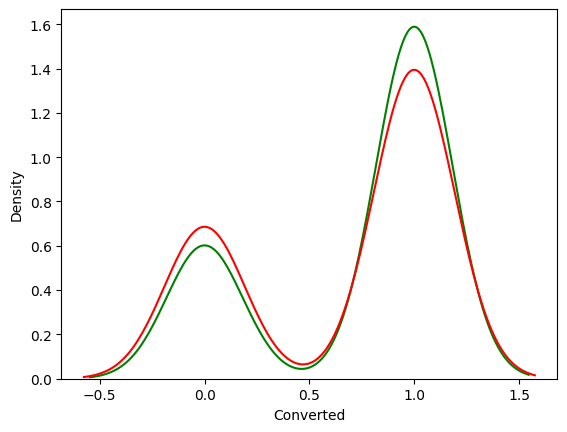

In [ ]:
sns.distplot(y_test_pred, color = 'green', hist = False)
sns.distplot(y_test, color = 'red', hist = False)
plt.show()

### Cut off tuning 


lead score = Coverting probability * 100

In [ ]:
#creating a dataframe to store Lead Score, y_train, and predictions together
lr_pred = pd.DataFrame({'Converted': y_train, 'Convert_pred': y_train_pred, 'Lead_Score': (y_train_pred*100).round(2)})

#obtaining results for a cut-off of 0.5
lr_pred['predicted'] = lr_pred['Convert_pred'].map(lambda x_test: 1 if x_test > 0.5 else 0)
lr_pred.head(100)

,Converted,Convert_pred,Lead_Score,predicted
3093,0.0,0.765024,76.50,1
2016,1.0,0.986850,98.68,1
9084,1.0,0.912795,91.28,1
7767,1.0,0.774888,77.49,1
2311,1.0,0.963720,96.37,1
...,...,...,...,...
2888,1.0,0.786894,78.69,1
9210,1.0,0.964070,96.41,1
2293,0.0,0.751792,75.18,1
8927,0.0,0.773970,77.40,1


In [ ]:
lr_pred.predicted.value_counts()

predicted
1    210
Name: count, dtype: int64

In [ ]:
print(classification_report(lr_pred['Converted'], lr_pred['predicted']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        54
         1.0       0.74      1.00      0.85       156

    accuracy                           0.74       210
   macro avg       0.37      0.50      0.43       210
weighted avg       0.55      0.74      0.63       210



/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#classification report
print('\nTest Precision Score   : {}%\n'.format((precision_score(y_test['Converted'], y_test['final_predicted'])*100).round(2)))
print('Test Recall Score      : {}%\n'.format((recall_score(y_test['Converted'], y_test['final_predicted'])*100).round(2)))
print('Test F-measure         : {}%\n'.format((f1_score(y_test['Converted'], y_test['final_predicted'])*100).round(2)))

KeyError: 'Converted'